In [1]:
import pandas as pd
from scipy.stats import chi2_contingency, f_oneway, kruskal

# Load the dataset
file_path = '/Users/huynh/Downloads/Final Evaluation.csv'
data = pd.read_csv(file_path)
data.head()

,file,VMONTH,VYEAR,VDAYR,YEAR,AGE,SEX,ETHNIC,RACE,USETOBAC,...,PHYSASST,NPNMW,RNLPN,OTHPROV,MHP,NODISP,REFOTHMD,RETAPPT,OTHDISP,ERADMHOS
0,opd2011.csv,January,2011.0,Monday,2011.0,63.0,Male,Not Hispanic or Latino,White Only,Not current,...,No,No,Yes,No,No,One or more disposition categories marked,No,Yes,No,No
1,opd2011.csv,January,2011.0,Monday,2011.0,72.0,Female,Not Hispanic or Latino,White Only,Not current,...,No,No,Yes,No,No,One or more disposition categories marked,No,Yes,No,No
2,opd2011.csv,January,2011.0,Tuesday,2011.0,77.0,Female,Not Hispanic or Latino,White Only,Not current,...,No,No,Yes,No,No,One or more disposition categories marked,No,Yes,No,No
3,opd2011.csv,January,2011.0,Tuesday,2011.0,27.0,Male,Not Hispanic or Latino,White Only,Current,...,No,Yes,Yes,No,No,One or more disposition categories marked,No,Yes,No,No
4,opd2011.csv,January,2011.0,Wednesday,2011.0,67.0,Male,Not Hispanic or Latino,White Only,Not current,...,No,No,Yes,No,No,One or more disposition categories marked,No,Yes,No,No


In [2]:
import pandas as pd
from scipy.stats import chi2_contingency, f_oneway, kruskal
from scipy.stats import shapiro, levene

# Function to perform chi-square test for categorical variables
def chi_square_test(data, categorical_variable, group_variable):
    contingency_table = pd.crosstab(data[group_variable], data[categorical_variable])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

# Function to perform ANOVA or Kruskal-Wallis test for numerical variables
def anova_or_kruskal(data, numerical_variable, group_variable):
    # Group the numerical variable by the group variable
    groups = [group.dropna().values for name, group in data.groupby(group_variable)[numerical_variable]]
    
    # Test for normality
    normality = all(shapiro(group)[1] > 0.05 for group in groups)
    # Test for homogeneity of variances
    homogeneity = levene(*groups)[1] > 0.05
    
    # If data is normal and variances are homogeneous, perform ANOVA
    if normality and homogeneity:
        stat, p = f_oneway(*groups)
        test_used = 'ANOVA'
    else:
        # Otherwise, perform Kruskal-Wallis test
        stat, p = kruskal(*groups)
        test_used = 'Kruskal-Wallis'
    
    return stat, p, test_used


# Actual variables from the dataset
categorical_variable = 'DIAG1'  
numerical_variable = 'BMI'
group_variable = 'RACE'

# Perform chi-square test
chi2_stat, chi2_p = chi_square_test(data, categorical_variable, group_variable)
print(f"Chi-square test for {categorical_variable} by {group_variable}:")
print(f"Chi-square Statistic: {chi2_stat}, P-value: {chi2_p}\n")

# Perform ANOVA or Kruskal-Wallis test
anova_stat, anova_p, test_used = anova_or_kruskal(data, numerical_variable, group_variable)
print(f"{test_used} test for {numerical_variable} by {group_variable}:")
print(f"Statistic: {anova_stat}, P-value: {anova_p}")

Chi-square test for DIAG1 by RACE:
Chi-square Statistic: 20677.112967790363, P-value: 1.0765941383215617e-285

Kruskal-Wallis test for BMI by RACE:
Statistic: 101.75378189939282, P-value: 2.255962361913568e-20


In [3]:
import pandas as pd
import numpy as np



# Assuming 'data' contains all the relevant variables
# One-hot encode selected categorical variables (simplifying for the example)
# For more complex variables like DIAG1, you might aggregate or select subcategories
categorical_vars = ['SEX', 'USETOBAC', 'ETHNIC']  # Simplified for the example
data_encoded = pd.get_dummies(data[categorical_vars])

# Combine encoded categorical data with numerical variables
numerical_vars = ['AGE', 'HTIN', 'WTLB', 'BMI', 'BPSYS', 'BPDIAS', 'TOTCHRON', 'NUMNEW', 'NUMCONT']
combined_data = pd.concat([data[numerical_vars], data_encoded], axis=1)

# Drop any rows with NaN values for simplicity
combined_data.dropna(inplace=True)

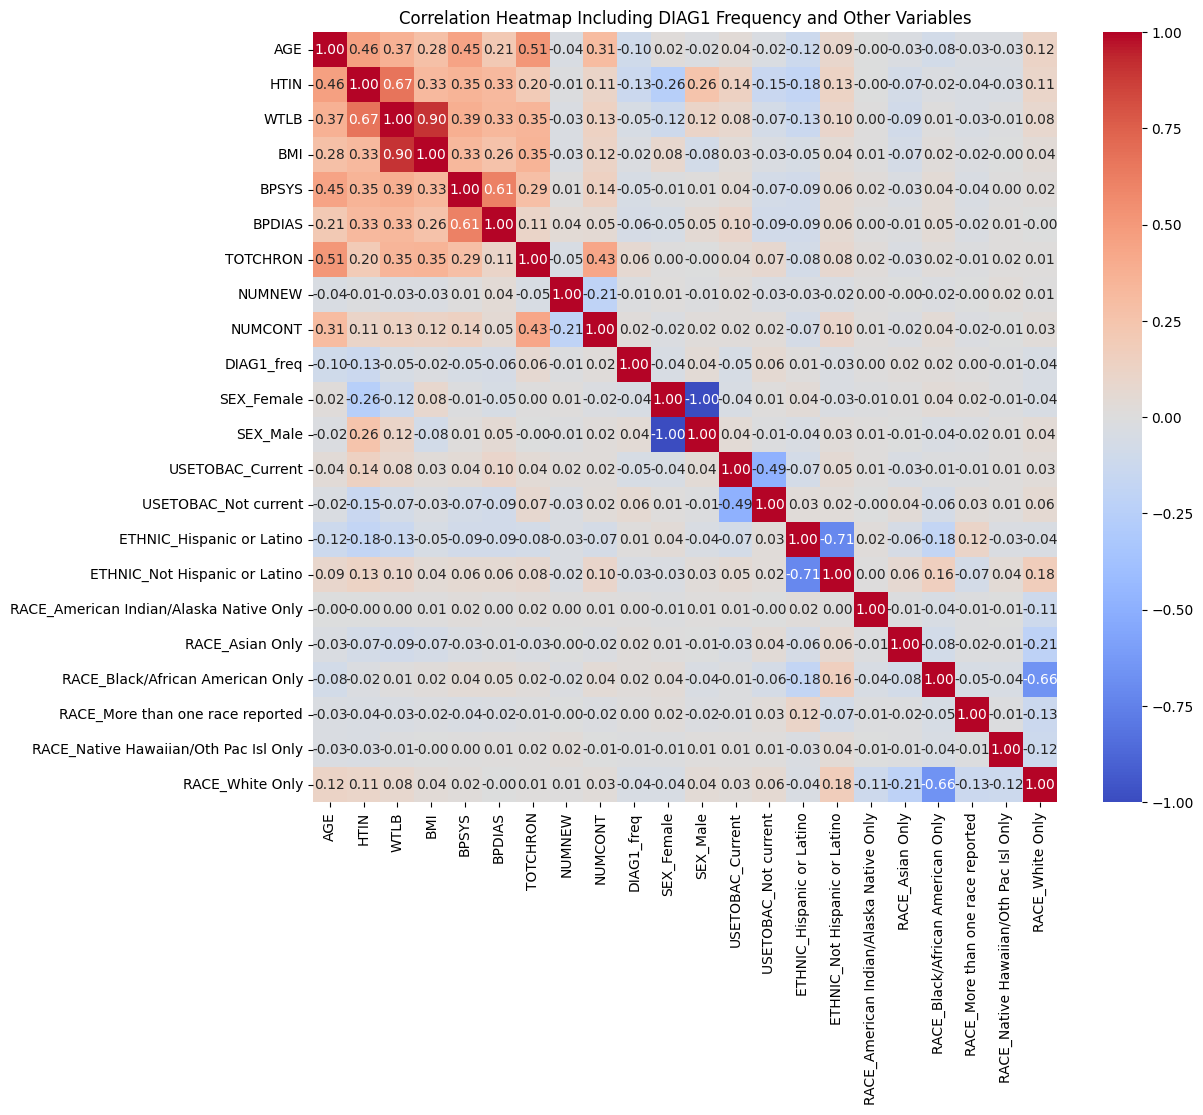

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Frequency encoding
frequency = data['DIAG1'].value_counts().to_dict()
data['DIAG1_freq'] = data['DIAG1'].map(frequency)
categorical_vars = ['SEX', 'USETOBAC', 'ETHNIC','RACE']  # Simplified for the example
data_encoded = pd.get_dummies(data[categorical_vars])
numerical_vars = ['AGE', 'HTIN', 'WTLB', 'BMI', 'BPSYS', 'BPDIAS', 'TOTCHRON', 'NUMNEW', 'NUMCONT', 'DIAG1_freq']
combined_data = pd.concat([data[numerical_vars], data_encoded], axis=1)

# Drop any rows with NaN values for simplicity
combined_data.dropna(inplace=True)

corr_matrix = combined_data.corr()

# Generate the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap Including DIAG1 Frequency and Other Variables')
plt.show()

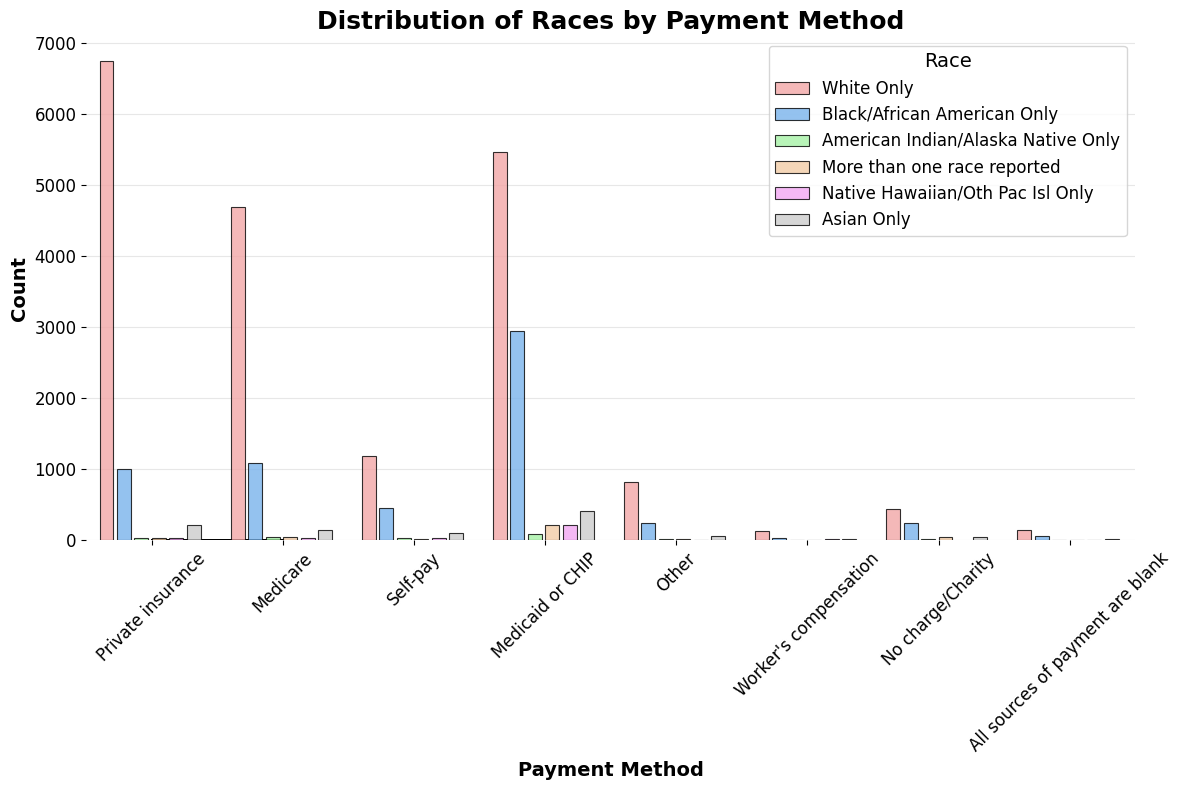

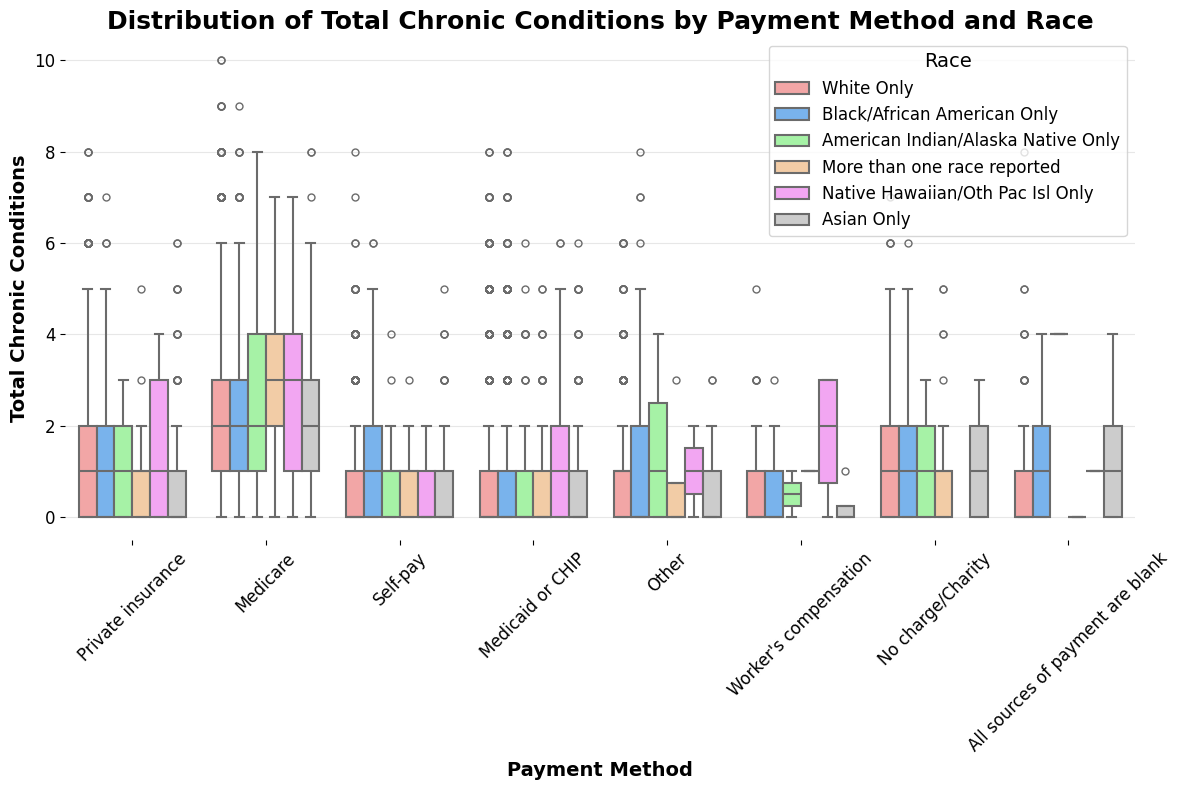

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import PathPatch
from matplotlib.path import Path


# Set a custom color palette
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FF99FF', '#CCCCCC']
sns.set_palette(colors)

# Stacked Bar Chart: Distribution of Races by Payment Method
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=data, x='PAYTYPER', hue='RACE', alpha=0.8, dodge=True, edgecolor='black', linewidth=0.8)

for bar in ax.patches:
    bar.set_width(bar.get_width() * 0.8)  # Adjust the width of the bars
    bar.set_edgecolor('black')  # Set the edge color to black
    bar.set_linewidth(0.8)  # Set the line width of the edges
    bar.set_alpha(0.8)  # Set the transparency of the bars
    bar.set_zorder(2)  # Set the z-order to bring the bars in front of the grid

    # Create rounded corners for the bars
    vertices = bar.get_path().vertices
    codes = bar.get_path().codes
    codes = codes.tolist()
    codes += [Path.LINETO, Path.CLOSEPOLY]
    vertices = vertices.tolist()
    vertices += [(vertices[-1][0], 0), (vertices[0][0], 0)]

    radius = 50  # Adjust the radius to control the roundness of the corners
    path = Path(vertices, codes)
    patch = PathPatch(path, edgecolor='black', facecolor=bar.get_facecolor(), linewidth=0.8)
    ax.add_patch(patch)

plt.xlabel('Payment Method', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Races by Payment Method', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Race', fontsize=12, title_fontsize=14)
plt.grid(axis='y', alpha=0.3, zorder=1)  # Set the z-order of the grid to be behind the bars
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# Box Plot: Distribution of Total Chronic Conditions by Payment Method and Race
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='PAYTYPER', y='TOTCHRON', hue='RACE', linewidth=1.5, fliersize=5)
plt.xlabel('Payment Method', fontsize=14, fontweight='bold')
plt.ylabel('Total Chronic Conditions', fontsize=14, fontweight='bold')
plt.title('Distribution of Total Chronic Conditions by Payment Method and Race',
          fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Race', fontsize=12, title_fontsize=14)
plt.grid(axis='y', alpha=0.3)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

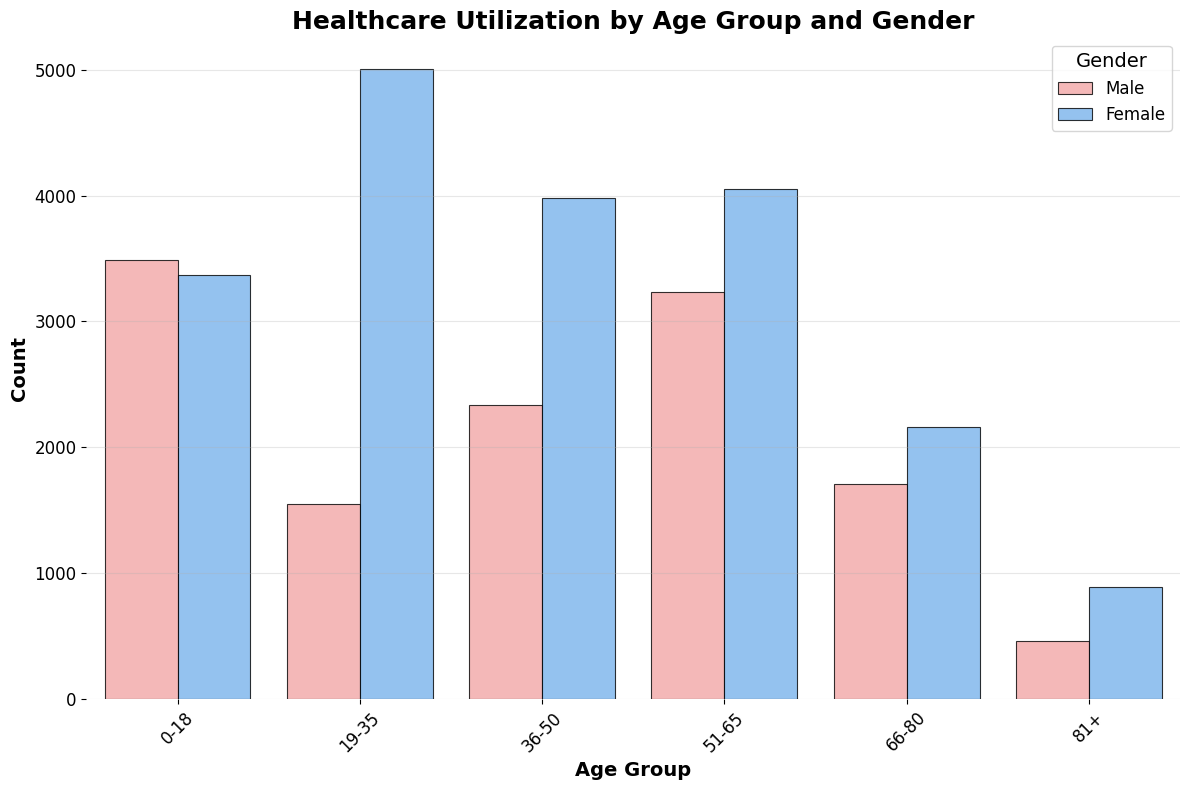

/var/folders/gh/r0x3ycy96jl80hqjpx7j_4z00000gn/T/ipykernel_84468/2024060809.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  utilization_data = data.groupby(['AGE_GROUP', 'PAYTYPER']).size().unstack()


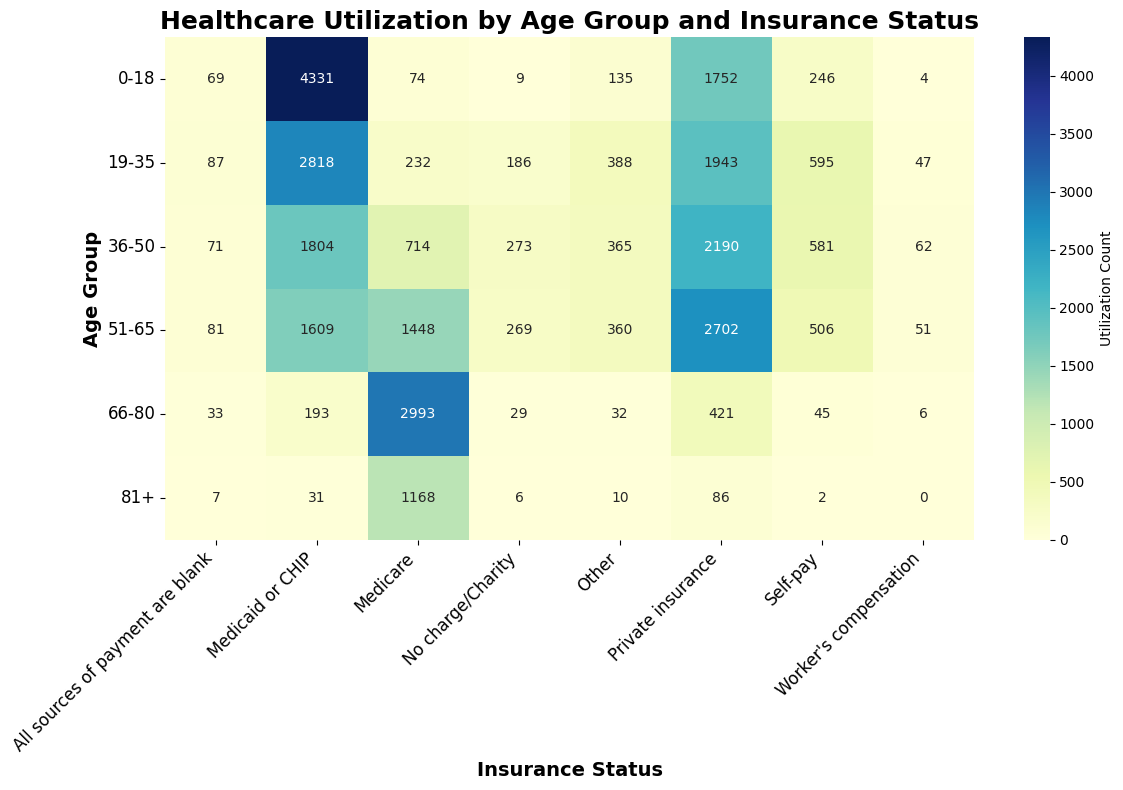

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Create age groups
data['AGE_GROUP'] = pd.cut(data['AGE'], bins=[0, 18, 35, 50, 65, 80, 100], 
                           labels=['0-18', '19-35', '36-50', '51-65', '66-80', '81+'])

# Stacked Bar Chart: Healthcare Utilization by Age Group and Gender
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=data, x='AGE_GROUP', hue='SEX', alpha=0.8, edgecolor='black', linewidth=0.8)

plt.xlabel('Age Group', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Healthcare Utilization by Age Group and Gender', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12, title_fontsize=14)
plt.grid(axis='y', alpha=0.3)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# Heatmap: Healthcare Utilization by Age Group and Insurance Status
utilization_data = data.groupby(['AGE_GROUP', 'PAYTYPER']).size().unstack()
utilization_data = utilization_data.fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(utilization_data, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Utilization Count'})

plt.xlabel('Insurance Status', fontsize=14, fontweight='bold')
plt.ylabel('Age Group', fontsize=14, fontweight='bold')
plt.title('Healthcare Utilization by Age Group and Insurance Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()